In [2]:
import pandas as pd
import numpy as np

In [3]:
original_data = pd.read_csv(
    "data/adult.csv",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Maratial Status",
        "Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Maratial Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


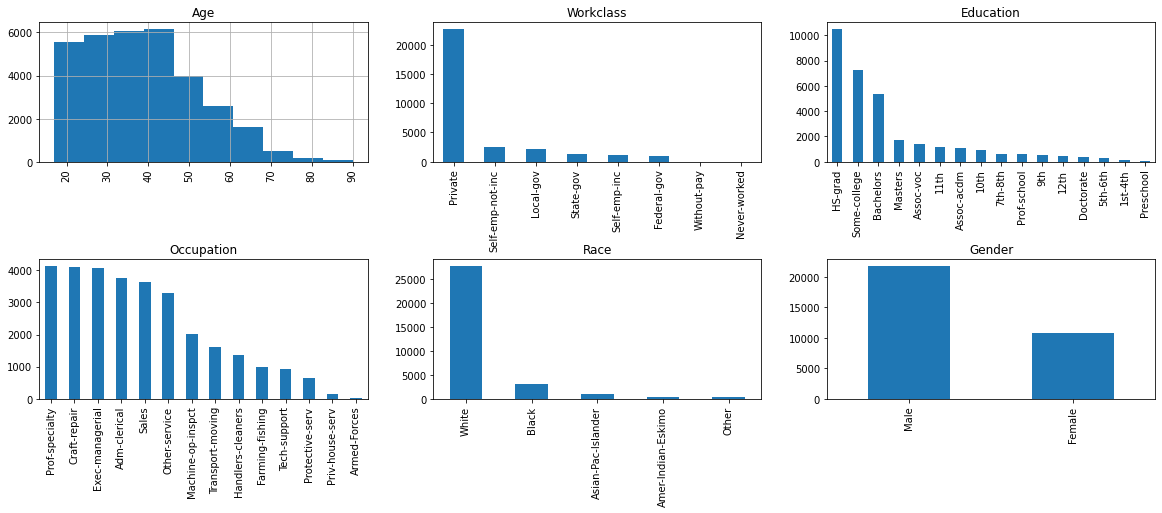

In [6]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

for i, column in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if original_data.dtypes[column] == object:
        original_data[column].value_counts().plot(kind="bar", axes = ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [7]:
# Use LabelEncoder to transform text to numbers
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Maratial Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Maratial Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [9]:
original_data.Target.unique()

array([0, 1])

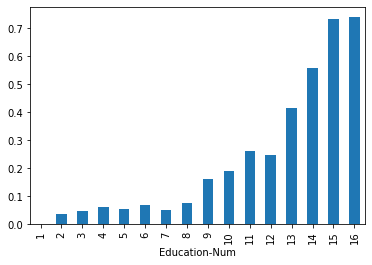

In [10]:
original_data.groupby('Education-Num').Target.mean().plot(kind="bar")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Taking only important features for now
X = original_data[['Education-Num', 'Occupation']]

y = original_data['Target']

# Splitting into 80% training and 20% testing set so as to check accuarcy
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.svm import SVC

# Declaring the model (SVC) with no tuning
classifier = SVC()

# Fitting the data. Training the SVC Model
classifier.fit(X_train, y_train)

# Testing the Accuracy by predicting the result
score = classifier.score(x_test, y_test)

print(score)
# O/P: 0.7861200675571933

0.7861200675571933


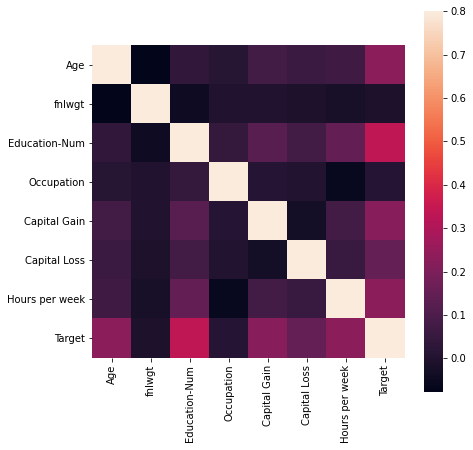

In [17]:
# Correlation Matrix
import seaborn as sns

corrmat = original_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.8, square=True);
plt.show()

In [18]:
# As only the labelled, i.e. numeric values are shown in the heatmap
# Let us convert other fields to numeric values by LabelEncoders

original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Maratial Status'] = le.fit_transform(original_data['Maratial Status'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))

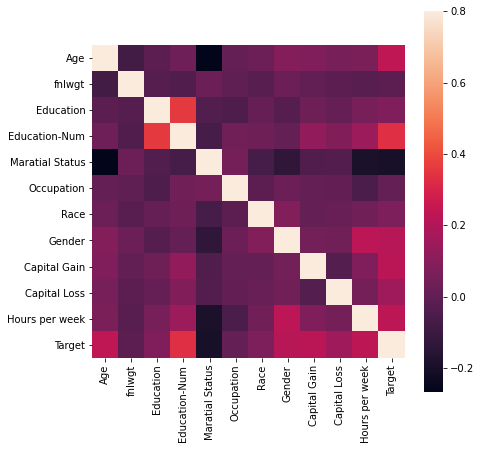

In [19]:
# Plot the heatmap from recreated correlation matrix
corrmat = original_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.8, square=True);
plt.show()

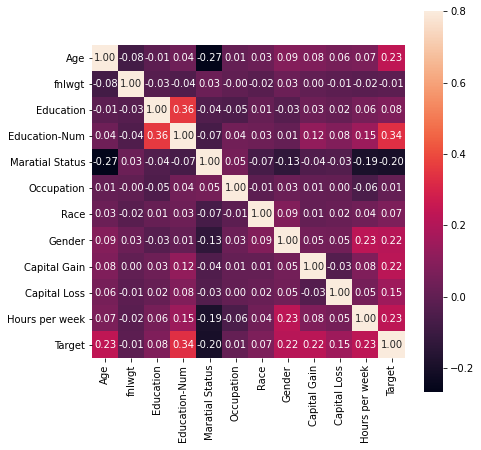

In [20]:
# Changing colours of heatmap to numerical values
# Getting the actual correlation values by annotating the heatmap
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f');
plt.show()

In [21]:
# Now we have the following conclusions:
# 1. Education and Education_Num have a quite strong correlation,
#    so, we need to use only one feature
# 2. Age seems to have a strong correlation with the Target
#
# Thus, we shall use Age as a parameter to see if it improves our model

# Resetting the features
X = original_data[['Education-Num', 'Occupation', 'Age']]
y = original_data['Target']

# Splitting into 80% training and 20% testing data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Declaring the model (SVC) with no tuning
classifier = SVC()

# Fitting the data- Training the SVC Model
classifier.fit(X_train, y_train)

# Testing the Accuracy by predicting the result
score = classifier.score(x_test, y_test)

print(score)
# O/P: 0.7858129894058038

0.7858129894058038


In [22]:
# 3. Gender (from the heatmap) also shows strong correlation, so, let's repeat
X = original_data[['Education-Num', 'Occupation', 'Age', 'Gender']]
y = original_data['Target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = SVC()
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)
# O/P: 0.7953324120988792

0.7953324120988792


In [23]:
# 4. Capital Gain, Hours per week
X = original_data[['Education-Num', 'Occupation', 'Age', 'Gender', 'Capital Gain', 'Hours per week']]
y = original_data['Target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = SVC()
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)
# O/P: 0.7945647167204053

0.7945647167204053


In [24]:
# Along with Parameters
# Kernel set to Radial Basis Function wiht penalty parameter C=1.0
X = original_data[['Education-Num', 'Occupation', 'Age', 'Gender']]
y = original_data['Target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = SVC(kernel='rbf', C=1.0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)
# O/P: 0.7953324120988792
# Reason: These are the default values anyways

0.7953324120988792


In [25]:
classifier = SVC(kernel='rbf', C=10.0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)
# O/P: 0.7968678028558268

'''
Hyperparameter Tuning: The process of changing the penalty value/ parameter
                       to obtain an optimum penalty
'''

0.7968678028558268


In [26]:
# Linear kernel
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)
# O/P: 0.796714263780132, almost same as before

0.796714263780132
